In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [9]:
file_path = "C:\\Users\\hp\\Employee.csv"
df = pd.read_csv(file_path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [13]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


DATA EXPLORATION

In [18]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print(f"Count: {df[col].nunique()}\n")

Unique values in 'Company':
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count: 6

Unique values in 'Age':
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count: 29

Unique values in 'Salary':
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count: 40

Unique values in 'Place':
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count: 11

Unique values in 'Country':
['India']
Count: 1

Unique values in 'Gender':
[0 1]
Count: 2



In [20]:
#Perform statistical analysis & rename columns
print(df.describe())
df.rename(columns={"Company": "Employer", "Place": "Location"}, inplace=True)

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


DATA CLEANING

In [25]:
print(df.isnull().sum())
df["Employer"].fillna("Unknown", inplace=True)
df["Age"].replace(0, pd.NA, inplace=True) 
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Salary"].fillna(df["Salary"].median(), inplace=True)
df["Location"].fillna("Unknown", inplace=True)

Employer     8
Age         18
Salary      24
Location    14
Country      0
Gender       0
dtype: int64


In [27]:
#remove duplicate rows
df.drop_duplicates(inplace=True)

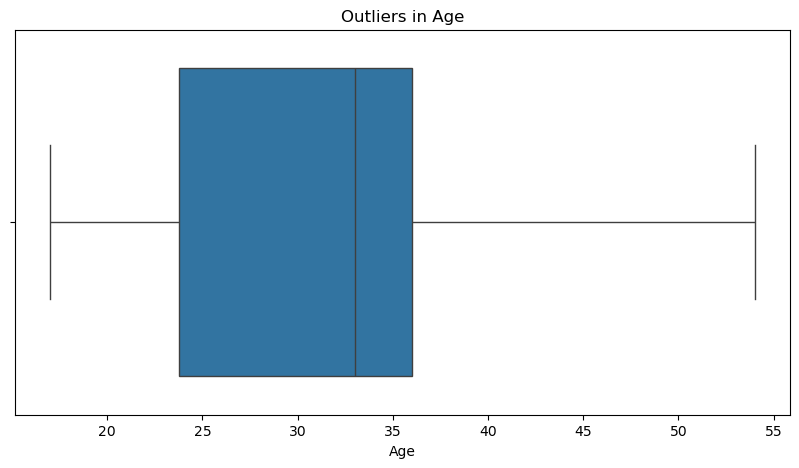

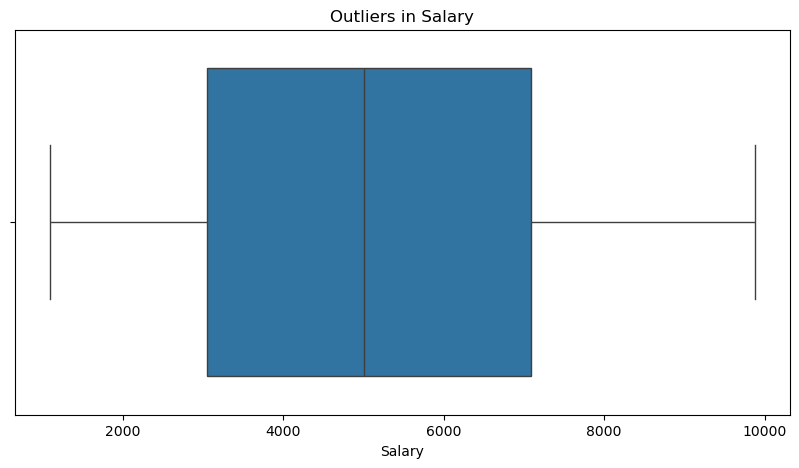

In [29]:
#Find the outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Age"])
plt.title("Outliers in Age")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Salary"])
plt.title("Outliers in Salary")
plt.show()


DATA ANALYSIS

In [32]:
filtered_df = df[(df["Age"] > 40) & (df["Salary"] < 5000)]
print(filtered_df)

    Employer   Age  Salary   Location Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


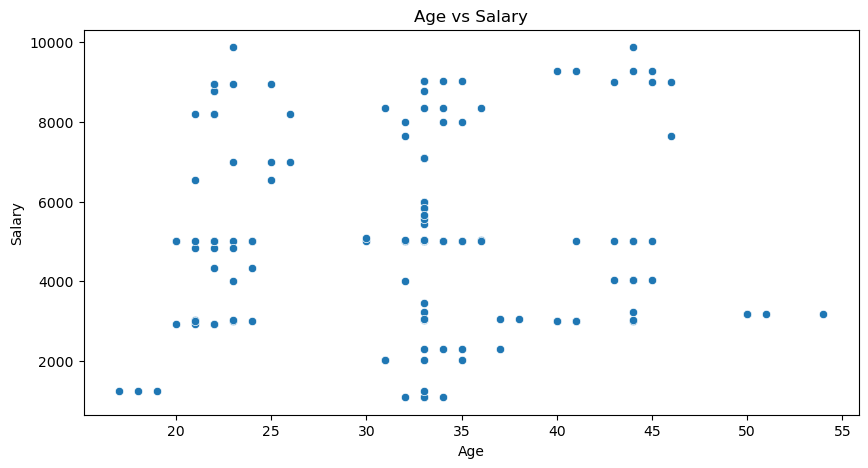

In [34]:
#Plot the chart with Age and Salary
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

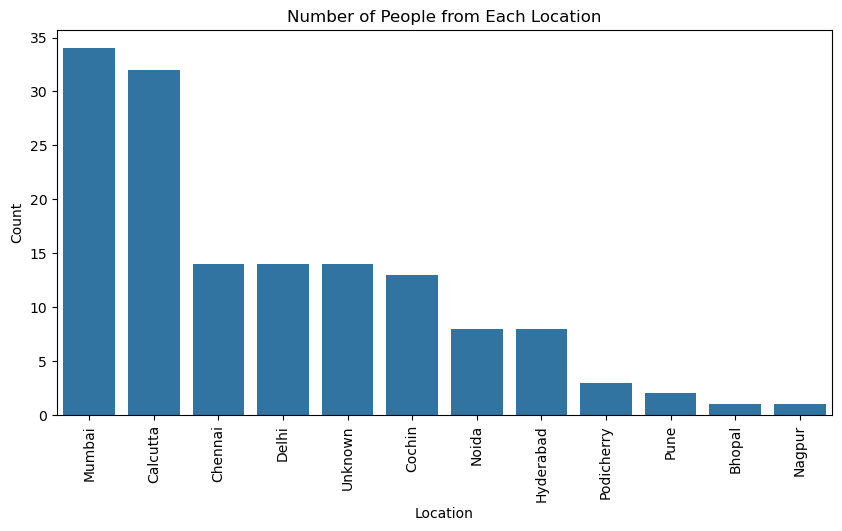

In [42]:
#Count the number of people from each place and represent it visually
place_counts = df["Location"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Number of People from Each Location")
plt.show()

 DATA ENCODING

In [45]:
label_encoders = {}
for col in ["Employer", "Location", "Country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

FEATURE SCALING

In [48]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df[["Age_standard", "Salary_standard"]] = scaler_standard.fit_transform(df[["Age", "Salary"]])
df[["Age_minmax", "Salary_minmax"]] = scaler_minmax.fit_transform(df[["Age", "Salary"]])

print(df.head())

   Employer   Age  Salary  Location  Country  Gender  Age_standard  \
0         4  20.0  5000.0         2        0       0     -1.484676   
1         2  30.0  5000.0         6        0       0     -0.267174   
2         4  35.0  2300.0         1        0       0      0.341577   
3         2  40.0  3000.0         4        0       0      0.950328   
4         4  23.0  4000.0         6        0       0     -1.119426   

   Salary_standard  Age_minmax  Salary_minmax  
0        -0.100827    0.081081       0.445089  
1        -0.100827    0.351351       0.445089  
2        -1.243735    0.486486       0.137817  
3        -0.947426    0.621622       0.217480  
4        -0.524127    0.162162       0.331285  
